In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

In [35]:
def datos_cinetica(archivo_csv):
    df = pd.read_csv(archivo_csv, sep=';')
    df_datos = df[["Time", "Sample", "GPolarization", "I1", "I2",]]
    return df_datos

datos = datos_cinetica("datos.csv")

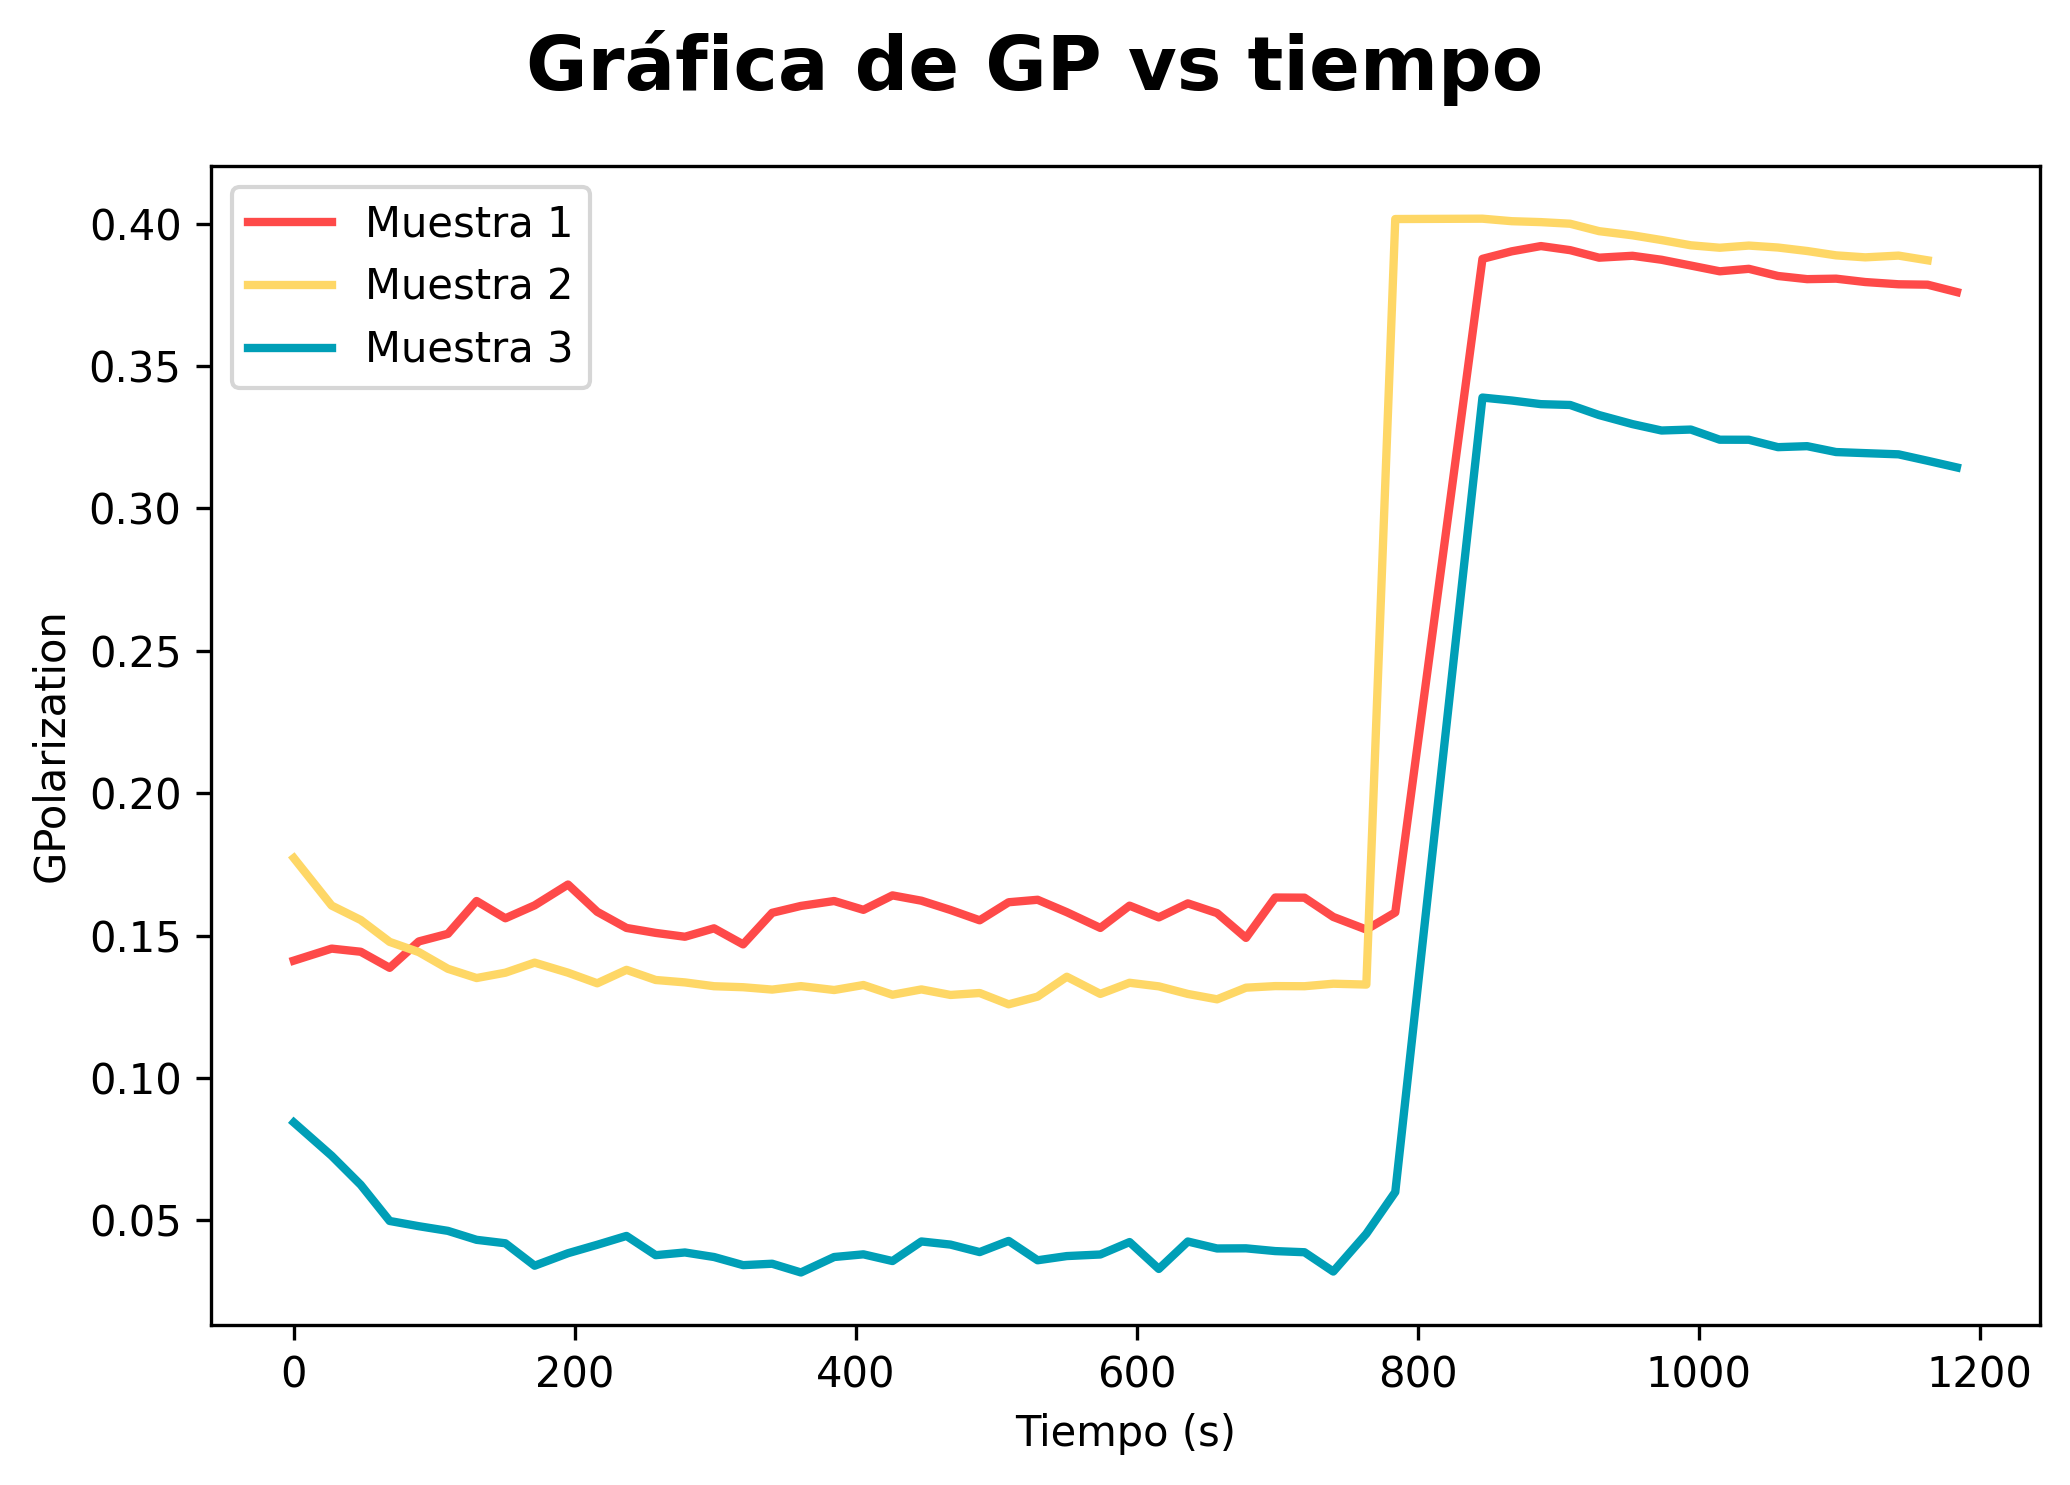

In [42]:
df = pd.read_csv("datos.csv", sep=';', engine='python', encoding='utf-8-sig')
df['Sample'] = df['Sample'].str.strip()
df[['Time','GPolarization','I1','I2']] = df[['Time','GPolarization','I1','I2']].apply(pd.to_numeric, errors='coerce')

orden_keys  = ['Sample','Blank','Reference']  
label_map = {'Sample': 'Muestra 1', 'Blank': 'Muestra 2', 'Reference': 'Muestra 3'}
color_map = {'Muestra 1': '#fe4a49', 'Muestra 2': '#fed766', 'Muestra 3': '#009fb7'}

fig, ax = plt.subplots(figsize=(7,5), dpi=300)

for key in orden_keys:
    sub = df[df['Sample'] == key]
    lab = label_map[key]
    ax.plot(sub['Time'], sub['GPolarization'], label=lab, color=color_map[lab], lw=2)


ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('GPolarization')
ax.legend()
fig.suptitle('Gráfica de GP vs tiempo', fontsize=18, weight='bold', y=0.98)

fig.tight_layout()
plt.show()


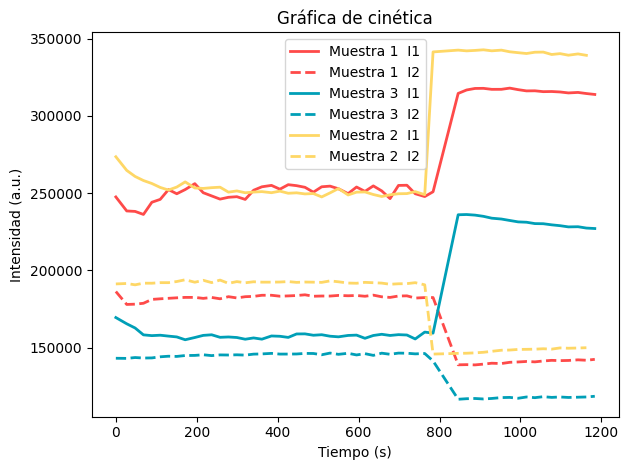

In [37]:
df['Sample'] = df['Sample'].str.strip()
df[['Time','GPolarization','I1','I2']] = df[['Time','GPolarization','I1','I2']].apply(pd.to_numeric, errors='coerce')

label_map = {'Sample': 'Muestra 1', 'Blank': 'Muestra 2', 'Reference': 'Muestra 3'}
color_map  = {'Muestra 1': '#fe4a49',   # azul
              'Muestra 2': '#fed766',   # naranja
              'Muestra 3': '#009fb7'}   # verde

plt.figure()
for name, sub in df.groupby('Sample', sort=False):
    base = label_map.get(name, name)
    col  = color_map.get(base)

    plt.plot(sub['Time'], sub['I1'], label=f'{base}  I1', color=col, linewidth=2)
    plt.plot(sub['Time'], sub['I2'], label=f'{base}  I2', color=col, linewidth=2, linestyle='--')

plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad (a.u.)')
plt.title('Gráfica de cinética')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\valen\AppData\Local\Temp\ipykernel_16228\3367257498.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, sub in df.groupby('Sample_es', sort=False):


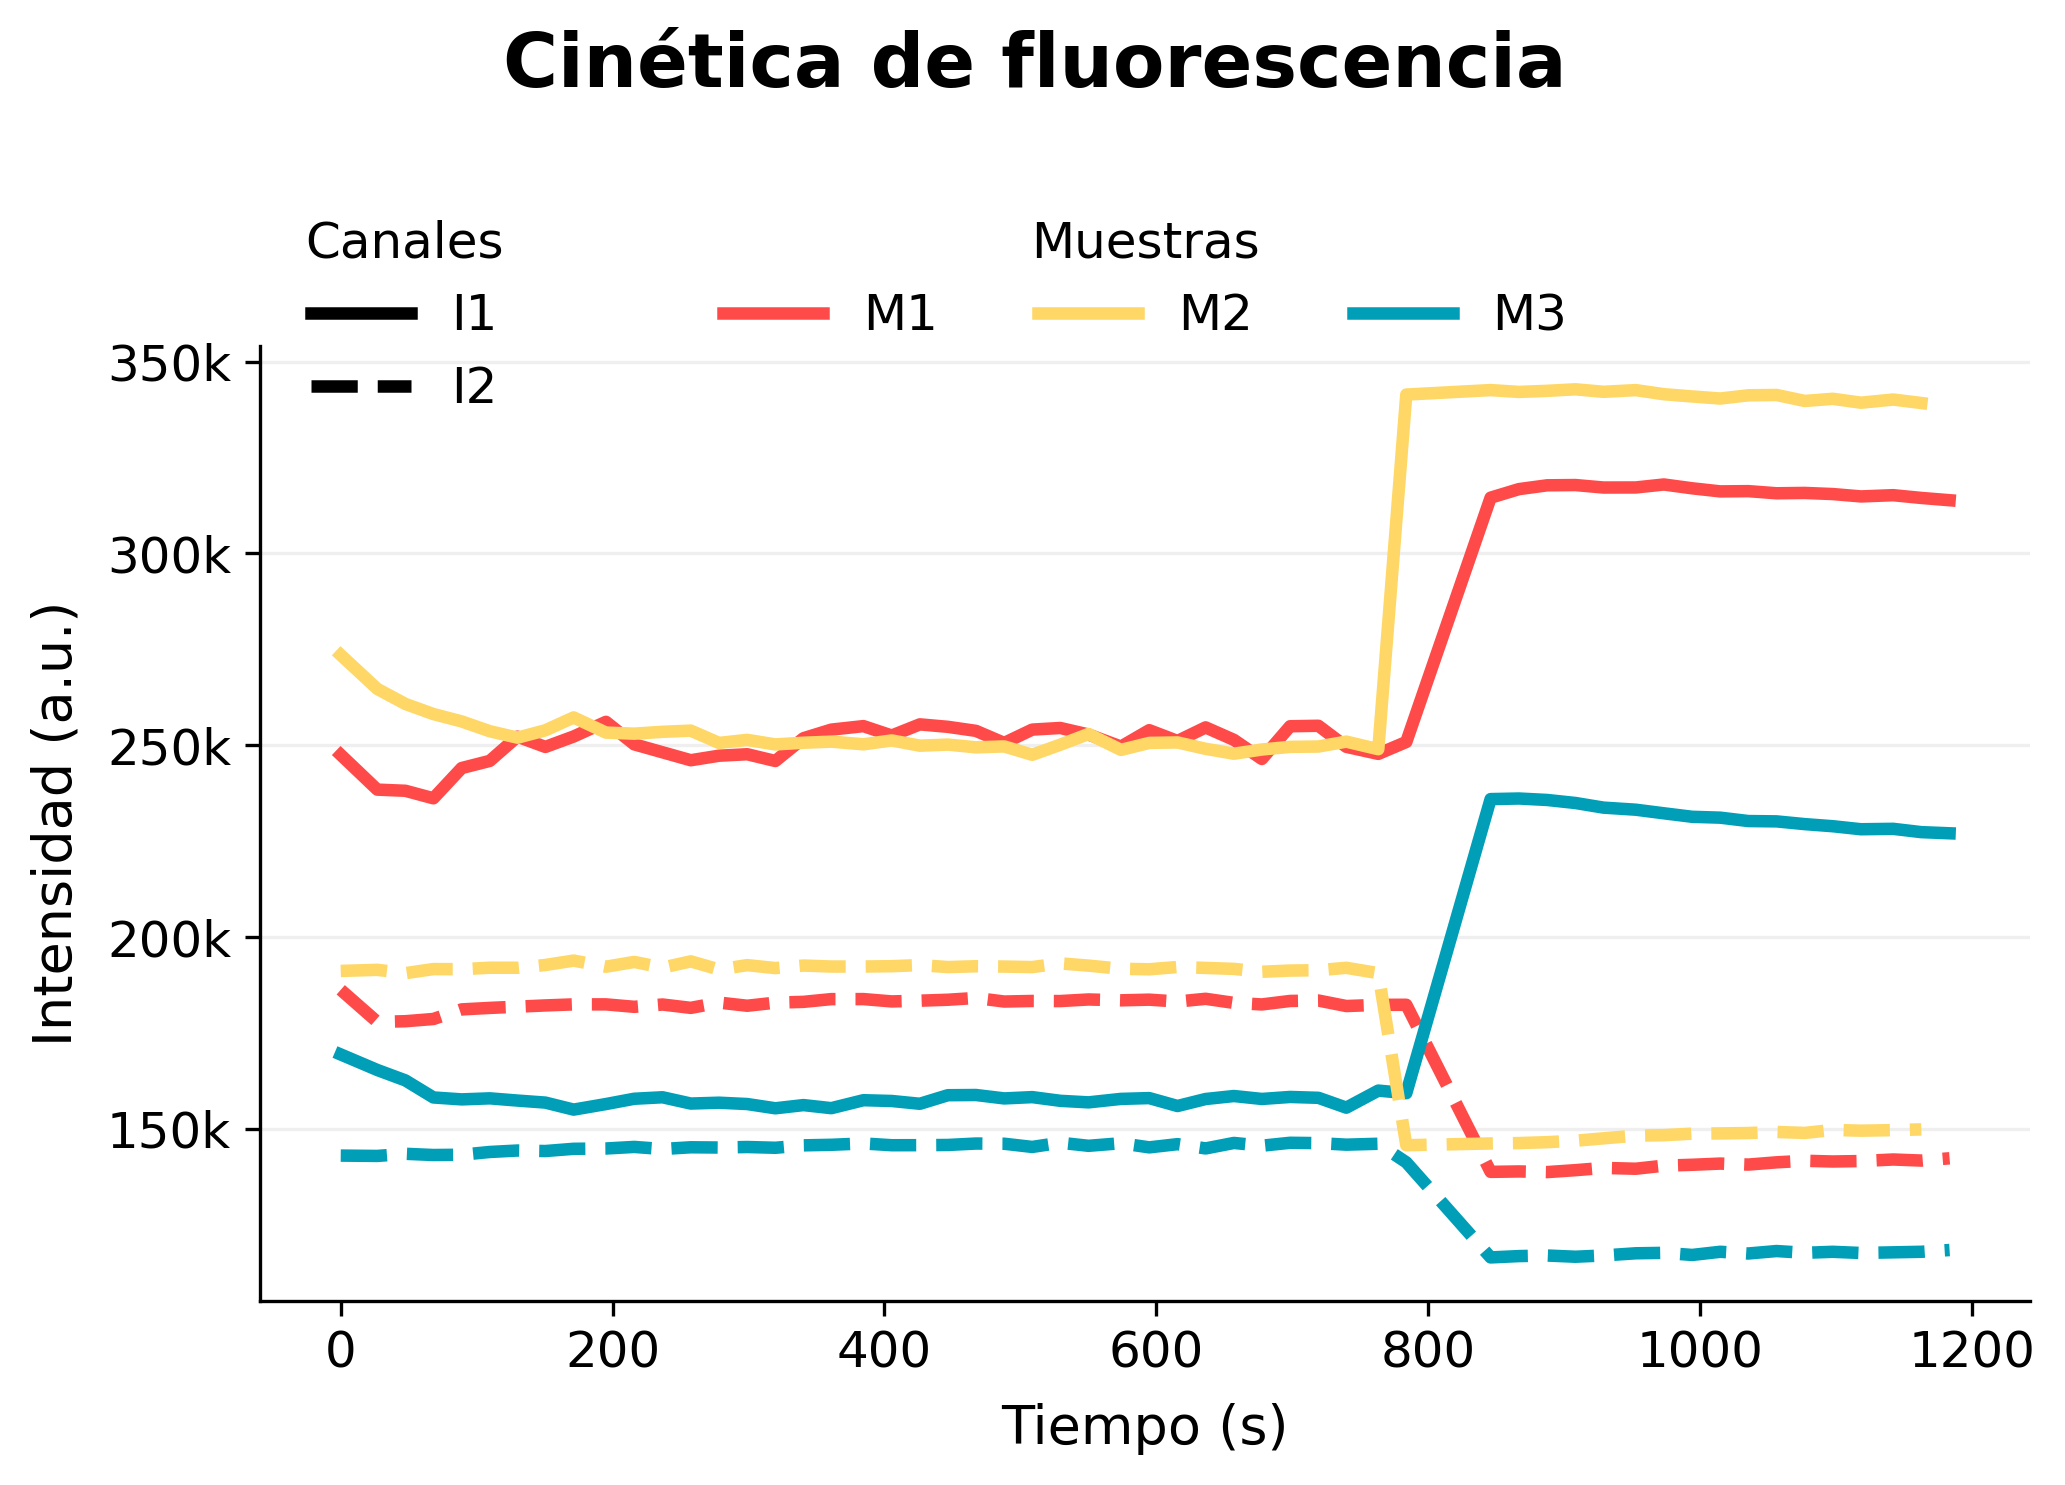

In [39]:
# Mapas
label_map = {'Sample': 'M1', 'Blank': 'M2', 'Reference': 'M3'}
order = ['M1', 'M2', 'M3']
color_map = {'M1': '#fe4a49', 'M2': '#fed766', 'M3': '#009fb7'}

df['Sample_es'] = df['Sample'].str.strip().map(label_map)
df['Sample_es'] = pd.Categorical(df['Sample_es'], categories=order, ordered=True)

fig, ax = plt.subplots(figsize=(7,5), dpi=300)

for name, sub in df.groupby('Sample_es', sort=False):
    col = color_map[name]
    ax.plot(sub['Time'], sub['I1'], label=name, color=col, lw=3)
    ax.plot(sub['Time'], sub['I2'], label=name, color=col, lw=3, ls='--') 

# Ejes, fuentes y formato
ax.set_xlabel('Tiempo (s)', fontsize=13, labelpad=6)
ax.set_ylabel('Intensidad (a.u.)', fontsize=13, labelpad=6)
ax.tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.2)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Leyenda principal (colores = muestras)
# Tomamos solo una entrada por muestra para evitar duplicados
handles, labels = ax.get_legend_handles_labels()
uniq = {}
for h, l in zip(handles, labels):
    if l not in uniq:
        uniq[l] = h
# reordenamos según 'order'
ordered_labels  = [l for l in order if l in uniq]
ordered_handles = [uniq[l] for l in ordered_labels]
leg1 = ax.legend(ordered_handles, ordered_labels, title='Muestras', ncol=3,
                 frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.18),
                 fontsize=12, title_fontsize=12)

# Mini-leyenda para estilos (I1/I2)
style_handles = [
    Line2D([0],[0], color='black', lw=3, ls='-',  label='I1'),
    Line2D([0],[0], color='black', lw=3, ls='--', label='I2'),
]
leg2 = ax.legend(handles=style_handles, title='Canales', frameon=False,
                 loc='upper left', bbox_to_anchor=(0.0, 1.18),
                 fontsize=12, title_fontsize=12)

ax.add_artist(leg1)  # mantener ambas leyendas

fig.suptitle('Cinética de fluorescencia', fontsize=18, weight='bold', y=0.98)

plt.tight_layout()
plt.show()
